By Rahul kumar 💻 ✈

github - https://github.com/Rahul5914

youtube - https://youtube.com/@biharwaleenginner?si=n-b4mPbcUZ35wt7P

linkedin - https://www.linkedin.com/in/rahul-kumar-3829b322a/

instagram: - @therahul5914

Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:06<00:00, 61.9MB/s]
100% 812M/812M [00:06<00:00, 141MB/s] 


In [ ]:
!ls  #list all the file in directory

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


not take all images i.e 250000 ,only take sample of image

Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.5063.jpg', 'dog.4080.jpg', 'cat.7349.jpg', 'dog.8567.jpg', 'dog.454.jpg', 'cat.2751.jpg', 'dog.11983.jpg', 'dog.11860.jpg', 'cat.7095.jpg', 'cat.3052.jpg', 'cat.2568.jpg', 'cat.11060.jpg', 'dog.624.jpg', 'dog.9544.jpg', 'cat.7728.jpg', 'dog.6366.jpg', 'cat.924.jpg', 'cat.428.jpg', 'cat.9185.jpg', 'cat.6692.jpg', 'dog.7565.jpg', 'dog.7456.jpg', 'cat.6215.jpg', 'dog.6870.jpg', 'cat.6210.jpg', 'dog.3052.jpg', 'cat.1289.jpg', 'cat.11017.jpg', 'dog.2707.jpg', 'cat.697.jpg', 'dog.4055.jpg', 'dog.7545.jpg', 'cat.12026.jpg', 'dog.5803.jpg', 'dog.5905.jpg', 'dog.3994.jpg', 'cat.11105.jpg', 'cat.7647.jpg', 'dog.2103.jpg', 'cat.9044.jpg', 'dog.4546.jpg', 'cat.3135.jpg', 'dog.8314.jpg', 'cat.2794.jpg', 'dog.3649.jpg', 'dog.4088.jpg', 'cat.5248.jpg', 'cat.7905.jpg', 'dog.6801.jpg', 'cat.10404.jpg', 'cat.5136.jpg', 'cat.5559.jpg', 'dog.1205.jpg', 'cat.9239.jpg', 'cat.3939.jpg', 'dog.10825.jpg', 'dog.4017.jpg', 'cat.5417.jpg', 'cat.11415.jpg', 'dog.8441.jpg', 'dog.10268.jpg', 'dog.9925.jpg', 'c

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats using matplot lib


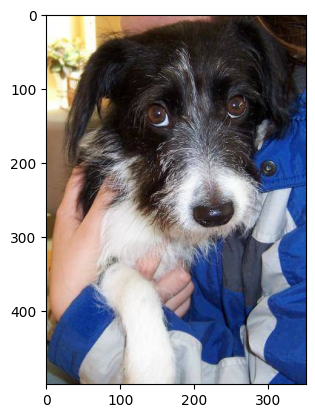

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.4080.jpg')
imgplt = plt.imshow(img)
plt.show()

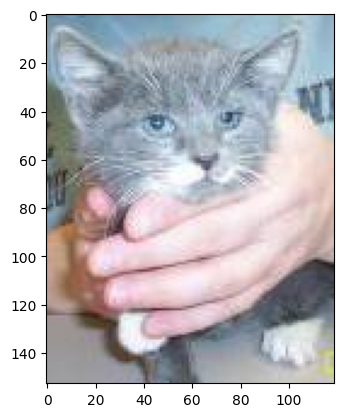

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.7349.jpg')
imgplt = plt.imshow(img)
plt.show()

all the images of cat and dog are of different sizes
but ,to train neural netwrok we need in same size

resize all images to comman size

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
dog
cat
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

taking only 2000 images not all 25000 images

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000): # extract only 2000 images

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

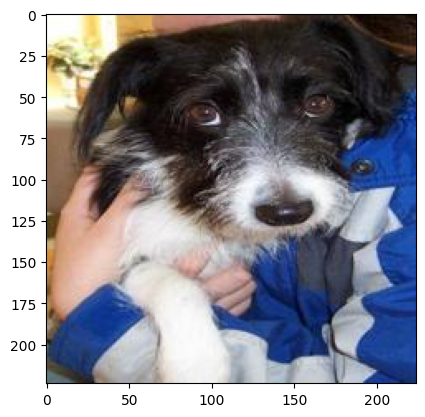

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.4080.jpg')
imgplt = plt.imshow(img)
plt.show()

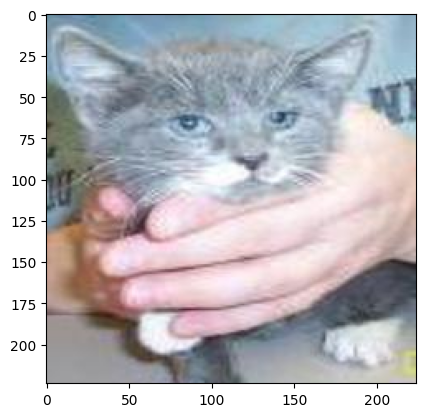

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.7349.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.5063.jpg', 'dog.4080.jpg', 'cat.7349.jpg', 'dog.8567.jpg', 'dog.454.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1014  986]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 98  95 104]
   [ 95  92 101]
   [ 97  94 103]
   ...
   [ 75  64  66]
   [ 72  61  63]
   [ 71  60  62]]

  [[ 97  94 103]
   [ 94  91 100]
   [ 95  92 101]
   ...
   [ 79  68  70]
   [ 79  68  70]
   [ 79  68  70]]

  [[ 95  92 101]
   [ 93  90  99]
   [ 94  91 100]
   ...
   [ 82  71  73]
   [ 83  72  74]
   [ 84  73  75]]

  ...

  [[ 89  87  93]
   [ 90  88  94]
   [ 93  91  97]
   ...
   [ 46  44  44]
   [ 45  43  43]
   [ 43  41  41]]

  [[ 86  84  90]
   [ 89  87  93]
   [ 94  92  98]
   ...
   [ 46  44  44]
   [ 46  44  44]
   [ 43  41  41]]

  [[ 84  82  88]
   [ 89  87  93]
   [ 95  93  99]
   ...
   [ 48  46  46]
   [ 48  46  46]
   [ 44  42  42]]]


 [[[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [  8  18  28]
   [ 13  23  33]
   [ 19  29  39]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [  0   9  19]
   [  2  12  22]
   [  4  14  24]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 11  19  32]
   [  8  16  29]
   [  4  12

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


total 2000 images, of size 224*224

3 represent its rgb image

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.25490196 0.41960784 0.53333333]
   [0.26666667 0.44705882 0.54117647]
   [0.2627451  0.44705882 0.52941176]
   ...
   [0.31764706 0.30980392 0.30980392]
   [0.07058824 0.0627451  0.08627451]
   [0.11764706 0.10588235 0.14117647]]

  [[0.25882353 0.42352941 0.5372549 ]
   [0.2745098  0.44705882 0.54117647]
   [0.25882353 0.44705882 0.51764706]
   ...
   [0.30196078 0.30196078 0.30196078]
   [0.0745098  0.06666667 0.09019608]
   [0.13333333 0.12156863 0.15686275]]

  [[0.27058824 0.42745098 0.5372549 ]
   [0.2745098  0.44705882 0.54117647]
   [0.25882353 0.44705882 0.51764706]
   ...
   [0.28235294 0.28235294 0.28235294]
   [0.06666667 0.05882353 0.08235294]
   [0.12941176 0.1254902  0.16078431]]

  ...

  [[0.63137255 0.61960784 0.62745098]
   [0.60784314 0.59607843 0.60392157]
   [0.58039216 0.56862745 0.57647059]
   ...
   [0.51372549 0.54117647 0.6       ]
   [0.49019608 0.50980392 0.56862745]
   [0.48235294 0.50196078 0.56078431]]

  [[0.63529412 0.62352941 0.63137255]
   [0.6

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

class MyModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(MyModel, self).__init__()
        self.pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)
        self.dense_layer = tf.keras.layers.Dense(num_classes)

    def call(self, inputs):
        x = self.pretrained_model(inputs)
        return self.dense_layer(x)

num_of_classes = 2
model = MyModel(num_of_classes)

model.build(input_shape=(None, 224, 224, 3))  # Build the model explicitly

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'my_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - acc: 0.7397 - loss: 0.4739
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - acc: 0.9715 - loss: 0.0851
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.9792 - loss: 0.0621
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.9826 - loss: 0.0514
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.9847 - loss: 0.0394


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 994ms/step - acc: 0.9880 - loss: 0.0444
Test Loss = 0.04866769164800644
Test Accuracy = 0.9800000190734863


Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


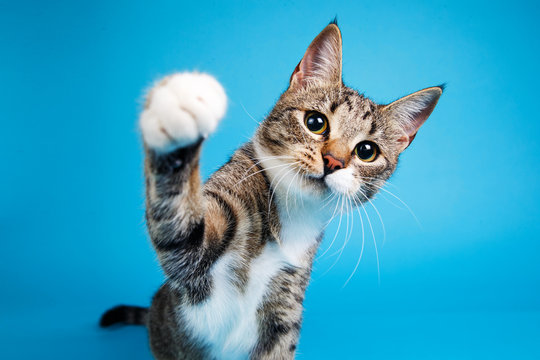

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[ 2.6694767 -4.2915354]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')